In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from math import pi as π
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.units import si,  def_unit
from freqandsee.freqandsee import Signal, WhiteNoise, LinearFilter, MovingAverageFilter, FlickerNoise
from freqandsee.freqandsee import AllanFilter,BarnesFilter, SignalBundle, FilterBank
from freqandsee.freqandsee import SimpleIntegrator

from freqandsee.project_logger import logger

logger.info("freqandsee is loaded")

2025-03-22 20:54:02,055 gramb freqandsee[162499] INFO freqandsee is loaded


In [2]:
n = int(1e6)
fs = 100 * u.kHz
ts = 1 / fs
time = np.arange(0, n + 1) * ts
time_short = time[:100]
fc = 3000 * u.hertz
wc = 2 * π * fc * u.rad
y = Signal(
    x=time_short,
    y=np.sin(wc * time_short) * u.volt,
    name="Aether sensor",
    x_name="t",
    y_name="Voltage",
)
pass

<Axes: title={'center': 'Aether sensor'}, xlabel='t ($\\mathrm{ms}$)', ylabel='Voltage ($\\mathrm{V}$)'>

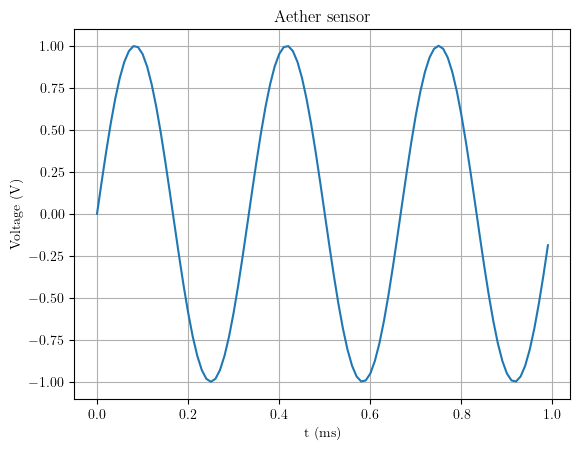

In [3]:
y.plot(x_display_unit=u.ms)

Instantiate a moving average filter and get its frequency response

In [4]:
h = MovingAverageFilter(n=8, name="MA2")
H = h.frequency_response(fs=1 / ts)
H

Signal name: 'Frequency response, MA2, fs=100.0 kHz' (kHz). n=5.12e+02 sampling points, fs=10.22 1 / kHz, RMS=3.55e-01.

<Axes: title={'center': 'Frequency response, MA2, fs=100.0 kHz'}, xlabel='Frequency ($\\mathrm{kHz}$)', ylabel='$|H(j2\\pi f)|$ $\\mathrm{}$'>

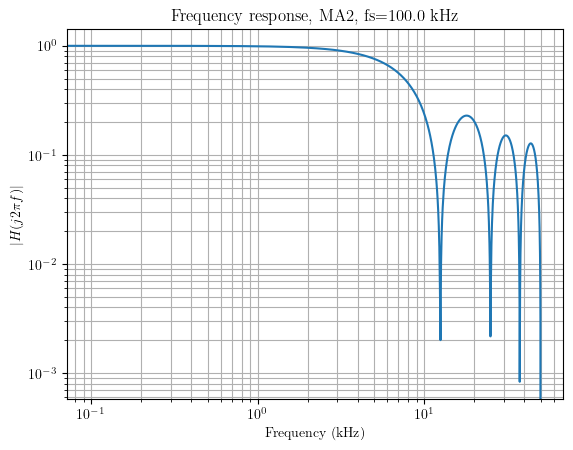

In [5]:
H.plot(x_display_unit=u.kHz, y_display_unit=u.dimensionless_unscaled)